<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working in IBM Cloud Watson Studio, please replace the command for installing nbformat from `!pip install nbformat==4.2.0` to simply `!pip install nbformat`


In [ ]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0

In [32]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [33]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.


In [34]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [41]:
tsla_data=yf.Ticker("TSLA")
print(tsla_data)


yfinance.Ticker object <TSLA>


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [223]:
tesla = tsla_data.history(period="10y")
tesla

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2013-11-25 00:00:00-05:00,8.300000,8.389333,8.020000,8.056000,154009500,0.0,0.0
2013-11-26 00:00:00-05:00,7.958667,8.181333,7.740000,8.033333,208282500,0.0,0.0
2013-11-27 00:00:00-05:00,8.087333,8.463333,7.968000,8.462667,185514000,0.0,0.0
2013-11-29 00:00:00-05:00,8.651333,8.706000,8.465333,8.485333,145743000,0.0,0.0
2013-12-02 00:00:00-05:00,8.423333,8.570000,8.262000,8.278000,116268000,0.0,0.0
...,...,...,...,...,...,...,...
2023-11-17 00:00:00-05:00,232.000000,237.389999,226.539993,234.300003,142532800,0.0,0.0
2023-11-20 00:00:00-05:00,234.039993,237.100006,231.020004,235.600006,116320100,0.0,0.0
2023-11-21 00:00:00-05:00,235.039993,243.619995,233.339996,241.199997,122288000,0.0,0.0


**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [47]:
import requests
url=" https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
r=requests.get(url)


Parse the html data using `beautiful_soup`.


In [48]:
soup=BeautifulSoup(r.text,"lxml")
soup

<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]--><!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]--><!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]--><!--[if gt IE 8]><!--><html class="no-js"> <!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<link href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" rel="canonical"/>
<title>Tesla Revenue 2010-2022 | TSLA | MacroTrends</title>
<meta content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2022. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.    
				
				&lt;ul style='margin-top:10px;'&gt;
				&lt;li&gt;Tesla revenue for the quarter ending September 30, 2022 

Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [49]:
table=soup.find("table",class_="historical_data_table table")
table

<table class="historical_data_table table">
<thead>
<tr>
<th colspan="2" style="text-align:center">Tesla Annual Revenue<br/><span style="font-size:14px;">(Millions of US $)</span></th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:center">2021</td>
<td style="text-align:center">$53,823</td>
</tr>
<tr>
<td style="text-align:center">2020</td>
<td style="text-align:center">$31,536</td>
</tr>
<tr>
<td style="text-align:center">2019</td>
<td style="text-align:center">$24,578</td>
</tr>
<tr>
<td style="text-align:center">2018</td>
<td style="text-align:center">$21,461</td>
</tr>
<tr>
<td style="text-align:center">2017</td>
<td style="text-align:center">$11,759</td>
</tr>
<tr>
<td style="text-align:center">2016</td>
<td style="text-align:center">$7,000</td>
</tr>
<tr>
<td style="text-align:center">2015</td>
<td style="text-align:center">$4,046</td>
</tr>
<tr>
<td style="text-align:center">2014</td>
<td style="text-align:center">$3,198</td>
</tr>
<tr>
<td style="text-align:center">2013</td

In [149]:
header=table.find_all("th")
head=[]
for i in header:
    hea=i.text
    head.append(hea)
print(head)

['Tesla Annual Revenue(Millions of US $)']


In [150]:
year=[]
row=table.find_all("tr")
for i in row[1:]:
    frist=i.find_all("td")[0].text
    year.append(frist)



In [230]:
Revenue=[]
row=table.find_all("tr")
for i in row[1:]:
    frist=i.find_all("td")[1].text
    print(frist)
    Revenue.append(frist)



$53,823
$31,536
$24,578
$21,461
$11,759
$7,000
$4,046
$3,198
$2,013
$413
$204
$117
$112


In [154]:
tesla_revenue=pd.DataFrame({"year":year,"Revenue":Revenue})
tesla_revenue

,year,Revenue
0,2021,"$53,823"
1,2020,"$31,536"
2,2019,"$24,578"
3,2018,"$21,461"
4,2017,"$11,759"
5,2016,"$7,000"
6,2015,"$4,046"
7,2014,"$3,198"
8,2013,"$2,013"
9,2012,$413


In [174]:
tesla_revenue["Revenue"]  = tesla_revenue["Revenue"] .replace({r'\$':''}, regex = True)

In [175]:
tesla_revenue

,year,Revenue
0,2021,"53,823"
1,2020,"31,536"
2,2019,"24,578"
3,2018,"21,461"
4,2017,"11,759"
5,2016,"7,000"
6,2015,"4,046"
7,2014,"3,198"
8,2013,"2,013"
9,2012,413


In [177]:
import re


In [178]:
tesla_revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   year     13 non-null     object
 1   Revenue  13 non-null     object
dtypes: object(2)
memory usage: 336.0+ bytes


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [185]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',',"")

In [187]:
tesla_revenue

,year,Revenue
0,2021,53823
1,2020,31536
2,2019,24578
3,2018,21461
4,2017,11759
5,2016,7000
6,2015,4046
7,2014,3198
8,2013,2013
9,2012,413


In [191]:
tesla_revenue["Revenue"]=tesla_revenue["Revenue"].astype("int")

In [193]:
tesla_revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   year     13 non-null     object
 1   Revenue  13 non-null     int32 
dtypes: int32(1), object(1)
memory usage: 284.0+ bytes


Execute the following lines to remove an null or empty strings in the Revenue column.


In [194]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the tesla_revenue dataframe using the head function

In [243]:
tesla_revenue.head(5)

,year,Revenue
0,2021,53823
1,2020,31536
2,2019,24578
3,2018,21461
4,2017,11759


Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [195]:
tesla_revenue.tail(5)

,year,Revenue
8,2013,2013
9,2012,413
10,2011,204
11,2010,117
12,2009,112


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [217]:
gme_data=yf.Ticker("GME")
gme_data

yfinance.Ticker object <GME>

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [221]:
hist=gme_data.history(period="10y")
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2013-11-25 00:00:00-05:00,9.080713,9.082504,8.731523,8.756594,22014000,0.00000,0.0
2013-11-26 00:00:00-05:00,8.769129,8.838967,8.595430,8.641988,18137200,0.00000,0.0
2013-11-27 00:00:00-05:00,8.649149,8.701080,8.538125,8.554241,14298800,0.00000,0.0
2013-11-29 00:00:00-05:00,8.633033,8.729732,8.584683,8.640196,9180800,0.00000,0.0
2013-12-02 00:00:00-05:00,8.734749,8.750957,8.424980,8.459199,16794000,0.06875,0.0
...,...,...,...,...,...,...,...
2023-11-17 00:00:00-05:00,12.520000,13.060000,12.520000,13.030000,3414200,0.00000,0.0
2023-11-20 00:00:00-05:00,13.000000,13.200000,12.800000,12.800000,2294900,0.00000,0.0
2023-11-21 00:00:00-05:00,12.650000,12.720000,12.260000,12.550000,3710100,0.00000,0.0


In [222]:
gme_data.history_metadata

{'currency': 'USD',
 'symbol': 'GME',
 'exchangeName': 'NYQ',
 'instrumentType': 'EQUITY',
 'firstTradeDate': 1013610600,
 'regularMarketTime': 1700848802,
 'gmtoffset': -18000,
 'timezone': 'EST',
 'exchangeTimezoneName': 'America/New_York',
 'regularMarketPrice': 12.2,
 'chartPreviousClose': 12.465,
 'priceHint': 2,
 'currentTradingPeriod': {'pre': {'timezone': 'EST',
   'start': 1701075600,
   'end': 1701095400,
   'gmtoffset': -18000},
  'regular': {'timezone': 'EST',
   'start': 1701095400,
   'end': 1701118800,
   'gmtoffset': -18000},
  'post': {'timezone': 'EST',
   'start': 1701118800,
   'end': 1701133200,
   'gmtoffset': -18000}},
 'dataGranularity': '1d',
 'range': '10y',
 'validRanges': ['1d',
  '5d',
  '1mo',
  '3mo',
  '6mo',
  '1y',
  '2y',
  '5y',
  '10y',
  'ytd',
  'max']}

**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data`.


In [226]:
import requests
url=" https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
r1=requests.get(url)


Parse the html data using `beautiful_soup`.


In [227]:
soup1=BeautifulSoup(r1.text,"lxml")
soup1

<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue --><html class="js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers no-applicationcache svg inlinesvg smil svgclippaths" style=""><!--<![endif]--><head><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><script async="" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/analytics.js.download" type="text/javascript"></script><script async="" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/gpt.js.download" type="text/javascript"></script><script async="" src="./G

Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column using a method similar to what you did in Question 2.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [228]:
table1=soup.find("table",class_="historical_data_table table")
table1

<table class="historical_data_table table">
<thead>
<tr>
<th colspan="2" style="text-align:center">GameStop Annual Revenue<br/><span style="font-size:14px;">(Millions of US $)</span></th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:center">2020</td>
<td style="text-align:center">$6,466</td>
</tr>
<tr>
<td style="text-align:center">2019</td>
<td style="text-align:center">$8,285</td>
</tr>
<tr>
<td style="text-align:center">2018</td>
<td style="text-align:center">$8,547</td>
</tr>
<tr>
<td style="text-align:center">2017</td>
<td style="text-align:center">$7,965</td>
</tr>
<tr>
<td style="text-align:center">2016</td>
<td style="text-align:center">$9,364</td>
</tr>
<tr>
<td style="text-align:center">2015</td>
<td style="text-align:center">$9,296</td>
</tr>
<tr>
<td style="text-align:center">2014</td>
<td style="text-align:center">$9,040</td>
</tr>
<tr>
<td style="text-align:center">2013</td>
<td style="text-align:center">$8,887</td>
</tr>
<tr>
<td style="text-align:center">2012</td>


In [232]:
header=table1.find_all("th")
head=[]
for i in header:
    hea=i.text
    head.append(hea)
print(head)

['GameStop Annual Revenue(Millions of US $)']


In [233]:
year=[]
row=table1.find_all("tr")
for i in row[1:]:
    frist=i.find_all("td")[0].text
    year.append(frist)
    
Revenue=[]
row=table1.find_all("tr")
for i in row[1:]:
    frist=i.find_all("td")[1].text
    print(frist)
    Revenue.append(frist)


$6,466
$8,285
$8,547
$7,965
$9,364
$9,296
$9,040
$8,887
$9,551
$9,474
$9,078
$8,806
$7,094
$5,319
$3,092
$1,843


In [234]:
gme_data=pd.DataFrame({"year":year,"Revenue":Revenue})
gme_data

,year,Revenue
0,2020,"$6,466"
1,2019,"$8,285"
2,2018,"$8,547"
3,2017,"$7,965"
4,2016,"$9,364"
5,2015,"$9,296"
6,2014,"$9,040"
7,2013,"$8,887"
8,2012,"$9,551"
9,2011,"$9,474"


In [235]:
gme_data["Revenue"]  = gme_data["Revenue"] .replace({r'\$':''}, regex = True)

In [236]:
gme_data

,year,Revenue
0,2020,"6,466"
1,2019,"8,285"
2,2018,"8,547"
3,2017,"7,965"
4,2016,"9,364"
5,2015,"9,296"
6,2014,"9,040"
7,2013,"8,887"
8,2012,"9,551"
9,2011,"9,474"


In [238]:
gme_data["Revenue"] = gme_data['Revenue'].str.replace(',',"")
gme_data

,year,Revenue
0,2020,6466
1,2019,8285
2,2018,8547
3,2017,7965
4,2016,9364
5,2015,9296
6,2014,9040
7,2013,8887
8,2012,9551
9,2011,9474


In [240]:
gme_data['Revenue']=gme_data['Revenue'].astype("int64")
gme_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   year     16 non-null     object
 1   Revenue  16 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 384.0+ bytes


Display the last five rows of the gme_revenue dataframe using the head function

In [244]:
gme_data.head(5)

,year,Revenue
0,2020,6466
1,2019,8285
2,2018,8547
3,2017,7965
4,2016,9364


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [241]:
gme_data.tail(5)

,year,Revenue
11,2009,8806
12,2008,7094
13,2007,5319
14,2006,3092
15,2005,1843


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`. Note the graph will only show data upto June 2021.


<Axes: xlabel='year', ylabel='Revenue'>

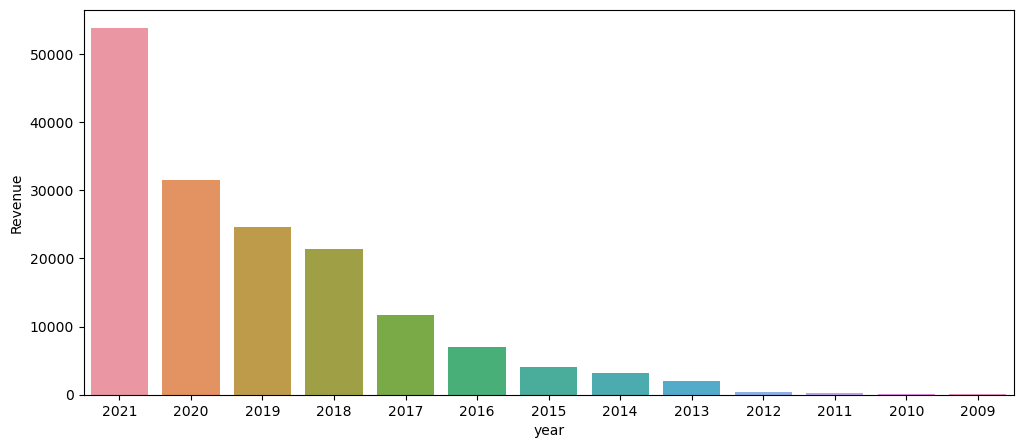

In [199]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
sns.barplot(x="year",y="Revenue",data=tesla_revenue)

## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


<Axes: xlabel='year', ylabel='Revenue'>

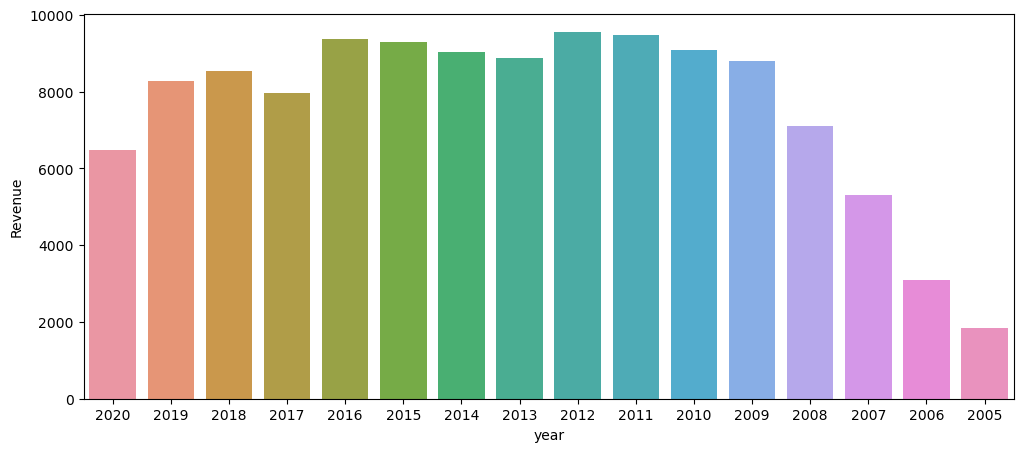

In [242]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
sns.barplot(x="year",y="Revenue",data=gme_data)

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
